In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/NhanDienKhuonMat/Training',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/NhanDienKhuonMat/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 92 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/30
31/31 [==============================] - 86s 3s/step - loss: 1.0843 - accuracy: 0.5761 - val_loss: 0.7884 - val_accuracy: 0.6000
Epoch 2/30
31/31 [==============================] - 6s 185ms/step - loss: 0.7249 - accuracy: 0.6957 - val_loss: 0.7522 - val_accuracy: 0.6000
Epoch 3/30
31/31 [==============================] - 4s 132ms/step - loss: 0.2861 - accuracy: 0.8696 - val_loss: 0.2188 - val_accuracy: 0.9231
Epoch 4/30
31/31 [==============================] - 4s 130ms/step - loss: 0.1438 - accuracy: 0.9674 - val_loss: 0.0315 - val_accuracy: 0.9846
Epoch 5/30
31/31 [==============================] - 4s 131ms/step - loss: 0.7285 - accuracy: 0.7717 - val_loss: 0.2984 - val_accuracy: 0.9692
Epoch 6/30
31/31 [==============================] - 4s 134ms/step - loss: 0.2653 - accuracy: 0.9239 - val_loss: 0.2483 - val_accuracy: 0.9538
Epoch 7/30
31/31 [==============================] - 4s 131ms/step - loss: 0.1013 - accuracy: 0.9783 - val_loss: 0.0662 - val_accuracy: 0.9692
Epoch 8/

In [ ]:
dir_path='/content/drive/MyDrive/NhanDienKhuonMat/Testing'

for i in os.listdir(dir_path):
  print(i)

2.jpg
4.jpg
1.jpg
5.jpg
6.jpg
3.jpg


In [ ]:
validation_dataset.class_indices

{'DUC_ANH': 0, 'MINH_QUAN': 1, 'QUANG_GIAO': 2}

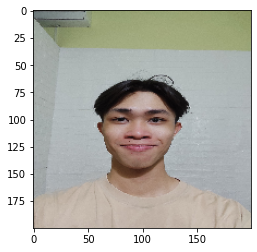

MINH_QUAN


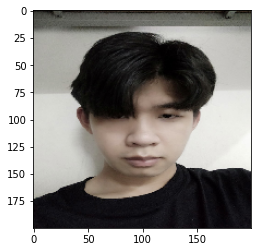

QUANG_GIAO


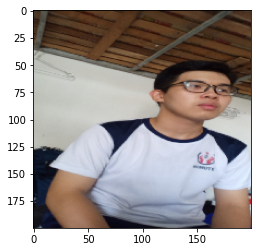

DUC_ANH


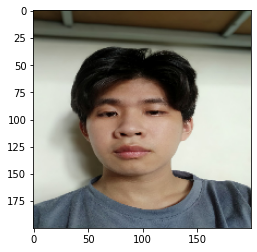

QUANG_GIAO


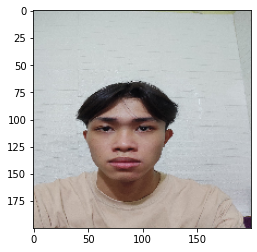

MINH_QUAN


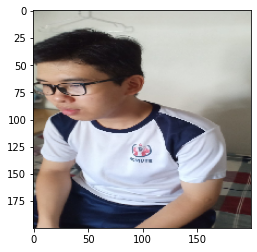

DUC_ANH


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/NhanDienKhuonMat/Testing'

for i in range (6):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("DUC_ANH")
    elif predict==1: 
      print("MINH_QUAN")
    elif predict==2: 
      print("QUANG_GIAO")